### **Loan Default Prediction using Random Forest Classifier**

This project investigates information about loan applicants and tries to predict loan default risk using Random Forest Classifier algorithm. Python libraries such as Pandas, NumPy, Matplotlib, Scikit-learn, and Seaborn have been utilized to make predictions

#### **The Dataset**

This dataset was found in Kaggle https://www.kaggle.com/datasets/yaminh/applicant-details-for-loan-approve

The Applicant-details.csv dataset provides essential information about loan applicants in India, including details such as annual income, age, work experience, marital status, and more. This dataset is designed to support loan approval processes by offering insights into applicant profiles, aiding in risk assessment, and facilitating informed lending decisions.

This dataset provides insights into various attributes of loan applicants in India, essential for assessing their eligibility for loan approval.

Here's a brief explanation of each column:

* Applicant_ID: Unique identifier for each loan applicant.
* Annual_Income: Annual income of the loan applicant.
* Applicant_Age: Age of the loan applicant.
* Work_Experience: Number of years of work experience of the loan applicant.
* Marital_Status: Marital status of the loan applicant.
* House_Ownership: Ownership status of the applicant's residence.
* Vehicle_Ownership(car): Ownership status of the applicant's vehicle.
* Occupation: Profession or occupation of the loan applicant.
* Residence_City: City where the loan applicant resides.
* Residence_State: State where the loan applicant resides.
* Years_in_Current_Employment: Number of years the applicant has been in their current job.
* Years_in_Current_Residence: Number of years the applicant has been residing in their current residence.
* Loan_Default_Risk: Whether an applicant defaulted or not. This can be used as sn indicator of loan default risk, with values indicating whether the loan applicant is at risk of defaulting on the loan. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### **Inspecting the Dataset**

In [86]:
raw_data = pd.read_csv('Applicant-details.csv')
data = raw_data.copy()
data.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

In [88]:
data.describe(include='all')

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,89763,92088,69665,2426,519,11255,NaN,NaN,NaN
mean,50000.500000,5.001617e+06,49.995400,10.110750,NaN,NaN,NaN,NaN,NaN,NaN,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,NaN,NaN,NaN,NaN,NaN,NaN,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


In [89]:
# Checking for missing values
data.isnull().sum()

Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

In [90]:
# Checking for duplicates
data.duplicated().sum()

np.int64(0)

#### **Cleaning dataset**

In [91]:
#Dropping 'Applicant ID' and 'Residence City'
data.drop(labels = ['Applicant_ID', 'Residence_City'], axis =1, inplace=True)

In [92]:
data.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,single,rented,no,Psychologist,Punjab,0,12,0
1,9259353,37,18,single,rented,no,Petroleum_Engineer,West_Bengal,12,11,0
2,1509721,66,8,single,rented,no,Drafter,Madhya_Pradesh,4,12,0
3,5867312,43,1,single,owned,no,Chartered_Accountant,Andhra_Pradesh,1,13,1
4,7223191,44,9,single,rented,no,Air_traffic_controller,West_Bengal,9,13,0


In [93]:
data['Residence_State'] = data['Residence_State'].str.replace('_', ' ')
data['Occupation'] = data['Occupation'].str.replace('_', ' ')
data.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,single,rented,no,Psychologist,Punjab,0,12,0
1,9259353,37,18,single,rented,no,Petroleum Engineer,West Bengal,12,11,0
2,1509721,66,8,single,rented,no,Drafter,Madhya Pradesh,4,12,0
3,5867312,43,1,single,owned,no,Chartered Accountant,Andhra Pradesh,1,13,1
4,7223191,44,9,single,rented,no,Air traffic controller,West Bengal,9,13,0


In [94]:
data['Occupation'] = data['Occupation'].str.title()
data['Occupation'].unique()

array(['Psychologist', 'Petroleum Engineer', 'Drafter',
       'Chartered Accountant', 'Air Traffic Controller',
       'Biomedical Engineer', 'Fashion Designer', 'Magistrate',
       'Technology Specialist', 'Lawyer', 'Civil Servant', 'Physician',
       'Financial Analyst', 'Design Engineer', 'Hotel Manager',
       'Engineer', 'Computer Hardware Engineer', 'Flight Attendant',
       'Comedian', 'Scientist', 'Mechanical Engineer', 'Geologist',
       'Aviator', 'Web Designer', 'Designer', 'Architect', 'Statistician',
       'Graphic Designer', 'Dentist', 'Consultant', 'Secretary',
       'Economist', 'Official', 'Chemical Engineer', 'Politician',
       'Army Officer', 'Microbiologist', 'Librarian',
       'Software Developer', 'Civil Engineer', 'Technical Writer', 'Chef',
       'Artist', 'Firefighter', 'Computer Operator', 'Surgeon',
       'Industrial Engineer', 'Police Officer', 'Analyst', 'Technician',
       'Surveyor'], dtype=object)

In [95]:
data['Residence_State'].unique()

array(['Punjab', 'West Bengal', 'Madhya Pradesh', 'Andhra Pradesh',
       'Assam', 'Bihar', 'Rajasthan', 'Uttar Pradesh', 'Chandigarh',
       'Karnataka', 'Delhi', 'Haryana', 'Gujarat', 'Maharashtra',
       'Chhattisgarh', 'Kerala', 'Tripura', 'Tamil Nadu', 'Sikkim',
       'Mizoram', 'Jharkhand', 'Uttar Pradesh[5]', 'Odisha', 'Telangana',
       'Jammu and Kashmir', 'Himachal Pradesh', 'Uttarakhand',
       'Puducherry', 'Manipur'], dtype=object)

In [96]:
data['Residence_State'] = data['Residence_State'].str.replace('Uttar Pradesh[5]','Uttar Pradesh')
data['Residence_State']

0                Punjab
1           West Bengal
2        Madhya Pradesh
3        Andhra Pradesh
4           West Bengal
              ...      
99995            Punjab
99996        Tamil Nadu
99997           Gujarat
99998         Karnataka
99999     Uttar Pradesh
Name: Residence_State, Length: 100000, dtype: object

#### **Data Visualisation**

In [97]:
data.corr(numeric_only=True)

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
Annual_Income,1.000000,-0.001025,0.007233,0.009235,-0.003549,-0.003692
Applicant_Age,-0.001025,1.000000,0.000277,0.004643,-0.026127,-0.022074
Work_Experience,0.007233,0.000277,1.000000,0.641511,0.022818,-0.026859
Years_in_Current_Employment,0.009235,0.004643,0.641511,1.000000,0.005723,-0.004657
Years_in_Current_Residence,-0.003549,-0.026127,0.022818,0.005723,1.000000,-0.003838
Loan_Default_Risk,-0.003692,-0.022074,-0.026859,-0.004657,-0.003838,1.000000


<Axes: >

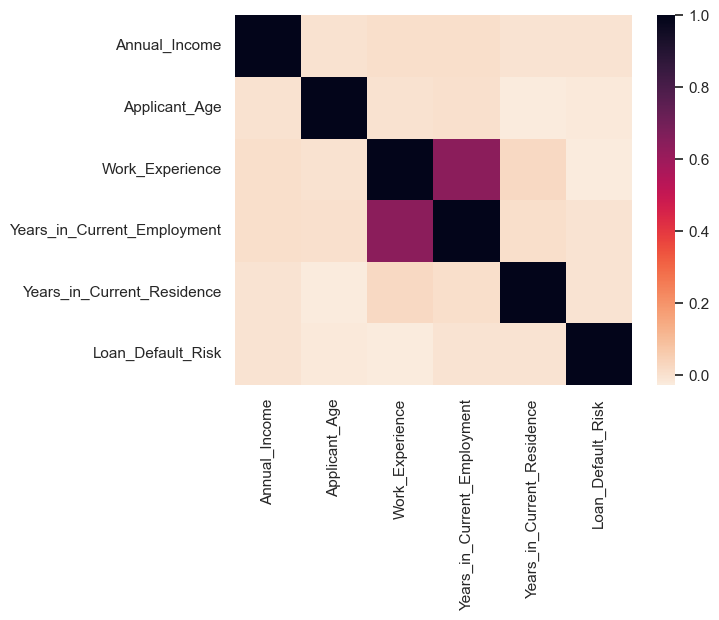

In [127]:
sns.heatmap(data.corr(numeric_only=True), cmap='rocket_r')

**`Years in Current Employement`** and **`Work Experience`** have a strong correlation. So there is multicollinearity, but since we will be using Random Forest Classifier which is robust to multicollinearity.

#### **Encoding Categorical Variables**

In [99]:
data['Marital_Status'].unique()

array(['single', 'married'], dtype=object)

In [100]:
data['House_Ownership'].unique()

array(['rented', 'owned', 'norent_noown'], dtype=object)

In [101]:
data['Vehicle_Ownership(car)'].unique()

array(['no', 'yes'], dtype=object)

In [102]:
data['Occupation'].nunique()

51

In [103]:
from sklearn.preprocessing import OneHotEncoder

data_cat = data.select_dtypes(include=['object'])
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
data_encoded = encoder.fit_transform(data_cat)

In [104]:
categorical_columns = encoder.get_feature_names_out(data_cat.columns)
one_hot_features = pd.DataFrame(data_encoded, columns=categorical_columns)

In [105]:
data_num = data.select_dtypes(exclude=['object'])
df_encoded = data_num.join(one_hot_features)

In [106]:
df_encoded.head()

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Marital_Status_married,Marital_Status_single,House_Ownership_norent_noown,House_Ownership_owned,...,Residence_State_Puducherry,Residence_State_Punjab,Residence_State_Rajasthan,Residence_State_Sikkim,Residence_State_Tamil Nadu,Residence_State_Telangana,Residence_State_Tripura,Residence_State_Uttar Pradesh,Residence_State_Uttarakhand,Residence_State_West Bengal
0,9657655,76,0,0,12,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9259353,37,18,12,11,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1509721,66,8,4,12,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5867312,43,1,1,13,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7223191,44,9,9,13,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 92 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Annual_Income                          100000 non-null  int64  
 1   Applicant_Age                          100000 non-null  int64  
 2   Work_Experience                        100000 non-null  int64  
 3   Years_in_Current_Employment            100000 non-null  int64  
 4   Years_in_Current_Residence             100000 non-null  int64  
 5   Loan_Default_Risk                      100000 non-null  int64  
 6   Marital_Status_married                 100000 non-null  float64
 7   Marital_Status_single                  100000 non-null  float64
 8   House_Ownership_norent_noown           100000 non-null  float64
 9   House_Ownership_owned                  100000 non-null  float64
 10  House_Ownership_rented                 100000 non-null  f

In [107]:
df_encoded.head()

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Marital_Status_married,Marital_Status_single,House_Ownership_norent_noown,House_Ownership_owned,...,Residence_State_Puducherry,Residence_State_Punjab,Residence_State_Rajasthan,Residence_State_Sikkim,Residence_State_Tamil Nadu,Residence_State_Telangana,Residence_State_Tripura,Residence_State_Uttar Pradesh,Residence_State_Uttarakhand,Residence_State_West Bengal
0,9657655,76,0,0,12,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9259353,37,18,12,11,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1509721,66,8,4,12,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5867312,43,1,1,13,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7223191,44,9,9,13,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### **Defining Features and Target Variable**

In [108]:
X = df_encoded.drop('Loan_Default_Risk', axis =1)
y = df_encoded['Loan_Default_Risk']

In [109]:
X

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Marital_Status_married,Marital_Status_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,Residence_State_Puducherry,Residence_State_Punjab,Residence_State_Rajasthan,Residence_State_Sikkim,Residence_State_Tamil Nadu,Residence_State_Telangana,Residence_State_Tripura,Residence_State_Uttar Pradesh,Residence_State_Uttarakhand,Residence_State_West Bengal
0,9657655,76,0,0,12,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9259353,37,18,12,11,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1509721,66,8,4,12,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5867312,43,1,1,13,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7223191,44,9,9,13,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,156398,69,10,7,14,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,1900932,69,11,5,10,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,6395936,66,11,11,14,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,4505937,52,6,6,14,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Loan_Default_Risk, Length: 100000, dtype: int64

#### **Train Test Split**

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [112]:
X_train.shape

(80000, 91)

In [113]:
X_test.shape

(20000, 91)

In [114]:
y_train.shape

(80000,)

In [115]:
y_test.shape

(20000,)

#### **Training Model**

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

#### **Evaluating Model**

In [125]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[16495   952]
 [  422  2131]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17447
           1       0.69      0.83      0.76      2553

    accuracy                           0.93     20000
   macro avg       0.83      0.89      0.86     20000
weighted avg       0.94      0.93      0.93     20000



The overall accuracy of the model is 0.93 (or 93%)